## Importação dos pacotes

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
#padroniza valores pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Carregando dados

In [3]:
%%time
data = pd.read_csv('fraud_detection_dataset.csv')
data.head(2)

Wall time: 11.9 s


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64000,C1231006815,170136.00000,160296.36000,M1979787155,0.00000,0.00000,0,0
1,1,PAYMENT,1864.28000,C1666544295,21249.00000,19384.72000,M2044282225,0.00000,0.00000,0,0


## Analise

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
#verificando nulos
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00000,6362620.00000,6362620.00000,6362620.00000,6362620.00000,6362620.00000,6362620.00000,6362620.00000
mean,243.39725,179861.90355,833883.10407,855113.66858,1100701.66652,1224996.39820,0.00129,0.00000
std,142.33197,603858.23146,2888242.67301,2924048.50297,3399180.11297,3674128.94209,0.03590,0.00159
min,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,156.00000,13389.57000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,239.00000,74871.94000,14208.00000,0.00000,132705.66500,214661.44000,0.00000,0.00000
75%,335.00000,208721.47750,107315.17500,144258.41000,943036.70750,1111909.25000,0.00000,0.00000
max,743.00000,92445516.64000,59585040.37000,49585040.37000,356015889.35000,356179278.92000,1.00000,1.00000


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

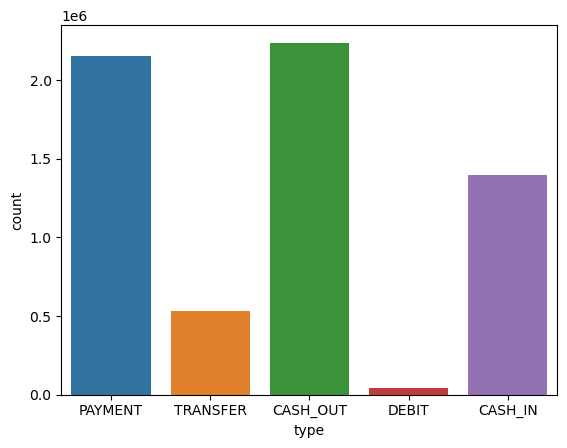

In [7]:
print(data["type"].value_counts())
sns.countplot(x="type", data=data)

0    6354407
1       8213
Name: isFraud, dtype: int64


<AxesSubplot:xlabel='isFraud', ylabel='count'>

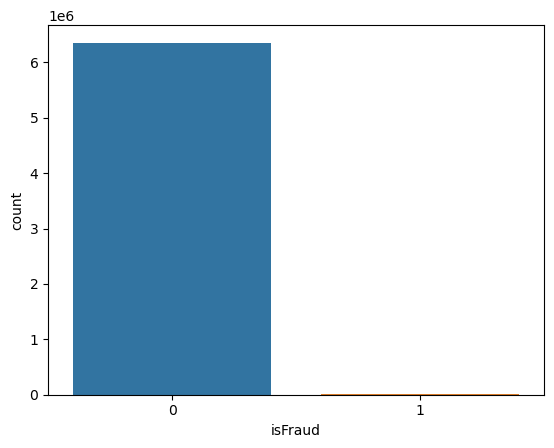

In [8]:
print(data["isFraud"].value_counts())
sns.countplot(x="isFraud", data=data)

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64


<AxesSubplot:xlabel='isFlaggedFraud', ylabel='count'>

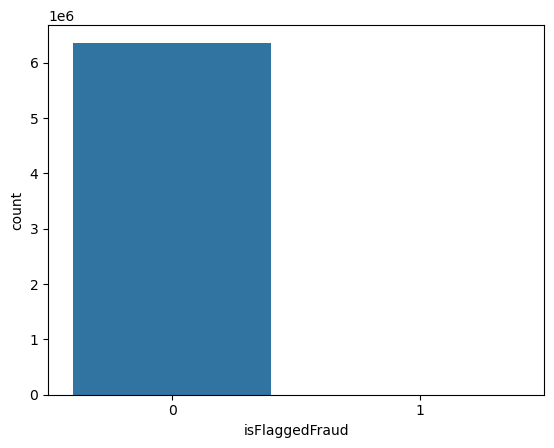

In [9]:
print(data["isFlaggedFraud"].value_counts())
sns.countplot(x="isFlaggedFraud", data=data)

### Tratamento de dados

In [10]:
data.shape

(6362620, 11)

In [11]:
data.drop_duplicates(keep=False, inplace=True)

In [12]:
data.shape

(6362620, 11)

In [13]:
def transfer_category(x):
    if x >= 100000:
        return('alto')
    elif x < 100000 and x >= 10000:
        return('medio')
    elif x < 10000:
        return('baixo')
    else:
        return("null")
data['transfer_amount_category'] = data["amount"].apply(transfer_category)    
data.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transfer_amount_category
0,1,PAYMENT,9839.64000,C1231006815,170136.00000,160296.36000,M1979787155,0.00000,0.00000,0,0,baixo
1,1,PAYMENT,1864.28000,C1666544295,21249.00000,19384.72000,M2044282225,0.00000,0.00000,0,0,baixo


In [14]:
data['transfer_amount_category'].value_counts()

alto     2837364
medio    2239253
baixo    1286003
Name: transfer_amount_category, dtype: int64

In [15]:
print(data[data["transfer_amount_category"] == "alto"]["isFraud"].value_counts())
print(data[data["transfer_amount_category"] == "medio"]["isFraud"].value_counts())
print(data[data["transfer_amount_category"] == "baixo"]["isFraud"].value_counts())

0    2830858
1       6506
Name: isFraud, dtype: int64
0    2237824
1       1429
Name: isFraud, dtype: int64
0    1285725
1        278
Name: isFraud, dtype: int64


formas de transferencias totais:
 CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64
-------
formas de transferencias fraudulentas:
 CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

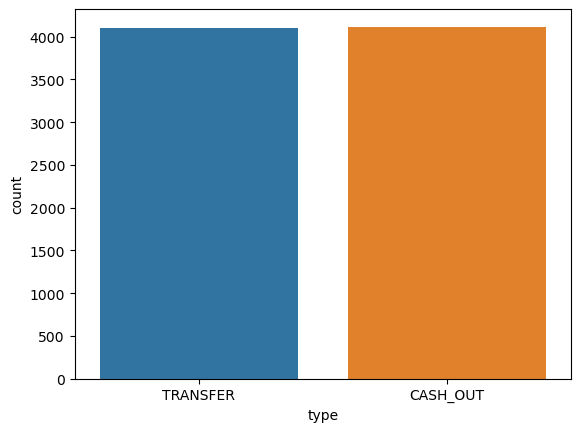

In [18]:
print("formas de transferencias totais:\n", data["type"].value_counts())
print("-------")
print("formas de transferencias fraudulentas:\n", data[data["isFraud"]==1]["type"].value_counts())
sns.countplot(x="type", data=data[data["isFraud"]==1])

### Preparação para modelo

In [19]:
label_encoder = LabelEncoder() 
data['type_encode'] = label_encoder.fit_transform(data['type']) 
data['nameOrig_encode'] = label_encoder.fit_transform(data['nameOrig']) 
data['nameDest_encode'] = label_encoder.fit_transform(data['nameDest']) 
data['transfer_amount_category_encode'] = label_encoder.fit_transform(data['transfer_amount_category']) 

In [20]:
data.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transfer_amount_category,balance_percentage,type_encode,nameOrig_encode,nameDest_encode,transfer_amount_category_encode
0,1,PAYMENT,9839.64000,C1231006815,170136.00000,160296.36000,M1979787155,0.00000,0.00000,0,0,baixo,5.78340,3,757869,1662094,1
1,1,PAYMENT,1864.28000,C1666544295,21249.00000,19384.72000,M2044282225,0.00000,0.00000,0,0,baixo,8.77350,3,2188998,1733924,1


In [21]:
normalizer = Normalizer()
amount_scale = normalizer.fit_transform(data.amount.values.reshape(1,-1))
data['amount_norm'] = amount_scale.reshape(-1,1)
amount_oldbalanceOrg = normalizer.fit_transform(data.oldbalanceOrg.values.reshape(1,-1))
data['oldbalanceOrg_norm'] = amount_oldbalanceOrg.reshape(-1,1)
amount_newbalanceOrig = normalizer.fit_transform(data.newbalanceOrig.values.reshape(1,-1))
data['newbalanceOrig_norm'] = amount_newbalanceOrig.reshape(-1,1)
amount_oldbalanceDest= normalizer.fit_transform(data.oldbalanceDest.values.reshape(1,-1))
data['oldbalanceDest_norm'] = amount_oldbalanceDest.reshape(-1,1)
amount_newbalanceDest = normalizer.fit_transform(data.newbalanceDest.values.reshape(1,-1))
data['newbalanceDest_norm'] = amount_newbalanceDest.reshape(-1,1)

In [22]:
data.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,balance_percentage,type_encode,nameOrig_encode,nameDest_encode,transfer_amount_category_encode,amount_norm,oldbalanceOrg_norm,newbalanceOrig_norm,oldbalanceDest_norm,newbalanceDest_norm
0,1,PAYMENT,9839.64000,C1231006815,170136.00000,160296.36000,M1979787155,0.00000,0.00000,0,...,5.78340,3,757869,1662094,1,0.00001,0.00002,0.00002,0.00000,0.00000
1,1,PAYMENT,1864.28000,C1666544295,21249.00000,19384.72000,M2044282225,0.00000,0.00000,0,...,8.77350,3,2188998,1733924,1,0.00000,0.00000,0.00000,0.00000,0.00000


## Modelagem

In [23]:
X = data[['type_encode','nameOrig_encode','nameDest_encode',
          'transfer_amount_category_encode','amount_norm',
          'oldbalanceOrg_norm','newbalanceOrig_norm',
          'oldbalanceDest_norm','newbalanceDest_norm']]
y = data["isFraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.33, 
                                                    stratify=y,
                                                    random_state = 40)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [24]:
%%time
#criando e treinando modelo randomForest
model = RandomForestClassifier(n_estimators = 5, random_state = 40)
  
model.fit(X_train, y_train) 

Wall time: 1min 46s


RandomForestClassifier(n_estimators=5, random_state=40)

In [25]:
#predições
pred = model.predict(X_test) 
cm = confusion_matrix(y_test, pred)

print("precisão: ", accuracy_score(y_test, pred))
print("confusion_matrix: ", cm)

precisão:  0.9996042225783637
confusion_matrix:  [[2096930      25]
 [    806    1904]]


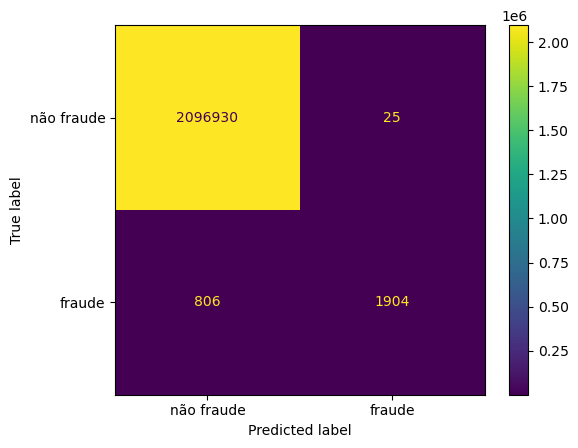

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['não fraude', 'fraude'])
disp.plot(values_format='d')